<a href="https://colab.research.google.com/github/ssddatascience/CAPSTONEPROJECT/blob/main/CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply. You are a data scientist, who has to come up with useful insights using the data and make prediction models to forecast the sales for X number of months/years.

Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.                                                                                                        

Store : Store number

Date : Week of Sales

Weekly_Sales : Sales for the given store in that week

Holiday_Flag : If it is a holiday week

Temperature : Temperature on the day of the sale

Fuel_Price : Cost of the fuel in the region

CPI : Consumer Price Index

Unemployment : Unemployment Rate

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Walmart.csv')

In [ ]:
df.info()

print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
(6435, 8)


In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
New_Data = df.loc[0:6434, ['Store','Date','Weekly_Sales','Temperature','Fuel_Price']]
New_Data

,Store,Date,Weekly_Sales,Temperature,Fuel_Price
0,1,05-02-2010,1643690.90,42.31,2.572
1,1,12-02-2010,1641957.44,38.51,2.548
2,1,19-02-2010,1611968.17,39.93,2.514
3,1,26-02-2010,1409727.59,46.63,2.561
4,1,05-03-2010,1554806.68,46.50,2.625
...,...,...,...,...,...
6430,45,28-09-2012,713173.95,64.88,3.997
6431,45,05-10-2012,733455.07,64.89,3.985
6432,45,12-10-2012,734464.36,54.47,4.000
6433,45,19-10-2012,718125.53,56.47,3.969


In [ ]:
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df['Store'].count()

6435

Analyze sales trends: By analyzing the weekly sales data for each store, we can identify the trends and patterns in sales over time. This information can help stores to adjust their inventory levels and plan for future sales more effectively.

In [ ]:
#Total Weakly sales from all stores

df['Weekly_Sales'].sum()

6737218987.11

In [ ]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [ ]:
# Group the data by store and date, and calculate the total sales for each week
weekly_sales = df.groupby(['Store', pd.Grouper(key='Date', freq='W-MON')])['Weekly_Sales'].sum().reset_index()

In [ ]:
weekly_sales

,Store,Date,Weekly_Sales
0,1,2010-01-11,1453329.50
1,1,2010-02-08,3087386.42
2,1,2010-02-22,1611968.17
3,1,2010-03-01,1409727.59
4,1,2010-03-15,3088197.31
...,...,...,...
5665,45,2012-10-08,1536694.44
5666,45,2012-10-22,718125.53
5667,45,2012-10-29,760281.43
5668,45,2012-11-05,770487.37


In [ ]:
weekly_sales_GRAPH = df['Weekly_Sales'].value_counts()

weekly_sales_GRAPH

1643690.90    1
446751.45     1
1332261.01    1
1366193.35    1
1384870.51    1
             ..
551799.63     1
573498.64     1
553901.97     1
533161.64     1
760281.43     1
Name: Weekly_Sales, Length: 6435, dtype: int64

In [ ]:
# Pivot the data to create a table with stores as columns and weekly sales as rows
weekly_sales_pivot = weekly_sales.pivot(index='Date', columns='Store', values='Weekly_Sales')

In [ ]:
# Calculate the rolling average of sales for each store over the past 12 weeks
rolling_average = weekly_sales_pivot.rolling(window=12).mean()

In [ ]:
rolling_average

Store,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-08,1.835675e+06,2.197243e+06,485966.666667,2.518346e+06,378051.788333,1.795850e+06,713481.749167,1.068834e+06,639724.095833,2.105699e+06,...,351067.749167,606544.177500,502981.262500,1.832068e+06,1.137946e+06,1.593082e+06,673531.635000,723540.288333,389954.899167,865661.396667
2012-10-22,1.822867e+06,2.193010e+06,487323.612500,2.516026e+06,374944.225000,1.781584e+06,706694.105833,1.066180e+06,637740.526667,2.107912e+06,...,350537.039167,608638.424167,497858.899167,1.829374e+06,1.123773e+06,1.587586e+06,667198.437500,720215.709167,388707.352500,861629.135833
2012-10-29,1.820087e+06,2.193376e+06,486366.912500,2.520138e+06,375223.152500,1.768525e+06,690143.471667,1.066278e+06,638840.014167,2.106143e+06,...,348383.039167,611032.837500,497963.368333,1.837561e+06,1.118891e+06,1.586248e+06,657753.187500,716879.835000,390756.317500,862501.165000


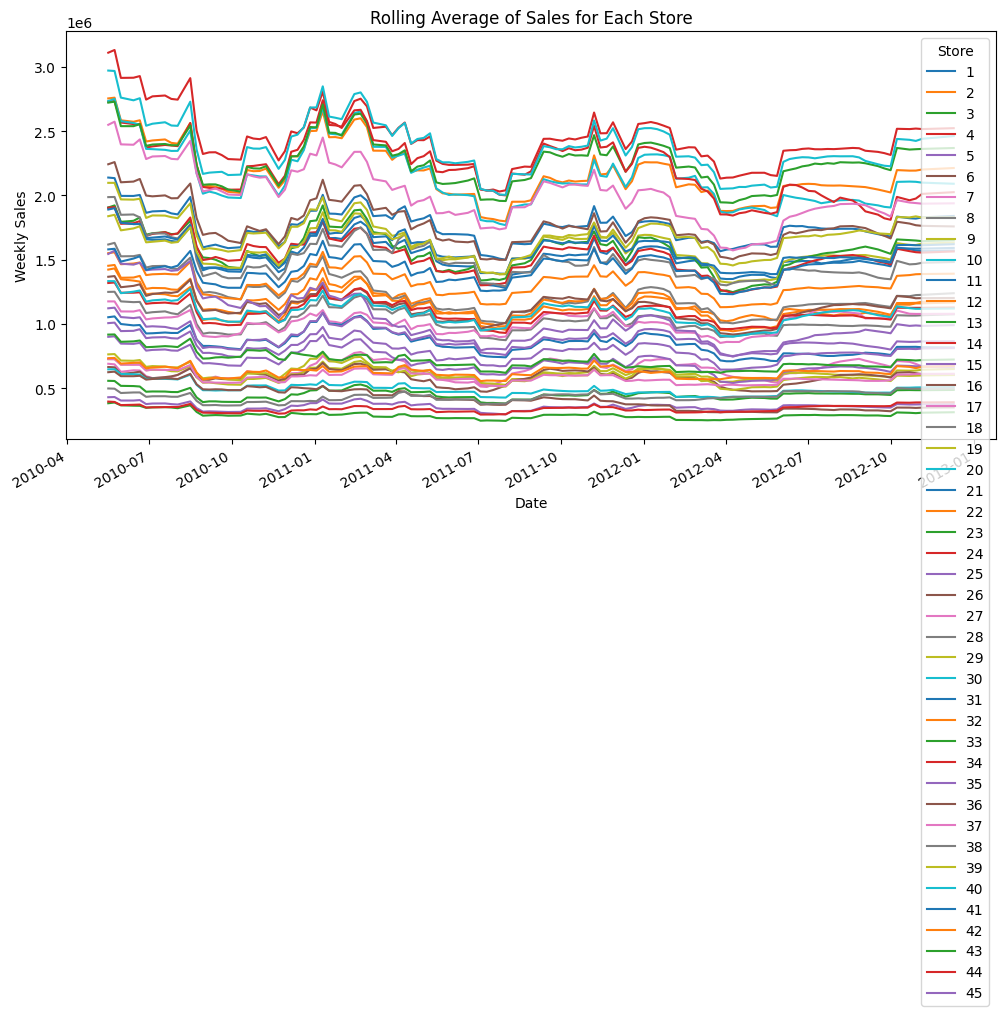

In [ ]:
#Plot the rolling average of sales for each store
rolling_average.plot(figsize=(12,6))
plt.title('Rolling Average of Sales for Each Store')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

Understand the impact of holidays: The Holiday_Flag column in the dataset indicates whether a given week is a holiday week or not. Analyzing the sales data for holiday weeks vs. non-holiday weeks can help stores to understand the impact of holidays on their sales and plan accordingly.

To analyze sales trends using the weekly sales data for each store, we can follow these steps:

Load the Walmart dataset into a pandas dataframe.

Convert the 'Date' column to a datetime format.

Group the data by store and date, and calculate the total sales for each week.
Pivot the data to create a table with stores as columns and weekly sales as rows.

Calculate the rolling average of sales for each store over the past 12 weeks.
Plot the rolling average of sales for each store.

Plot the trend of sales for each store.

Plot the distribution of sales for each store.




In [ ]:
# Group the data by store and date, and calculate the total sales for each week
weekly_sales = df.groupby(['Store', pd.Grouper(key='Date', freq='W-MON')])['Weekly_Sales'].sum().reset_index()
weekly_sales

,Store,Date,Weekly_Sales
0,1,2010-01-11,1453329.50
1,1,2010-02-08,3087386.42
2,1,2010-02-22,1611968.17
3,1,2010-03-01,1409727.59
4,1,2010-03-15,3088197.31
...,...,...,...
5665,45,2012-10-08,1536694.44
5666,45,2012-10-22,718125.53
5667,45,2012-10-29,760281.43
5668,45,2012-11-05,770487.37


In [ ]:
# Pivot the data to create a table with stores as columns and weekly sales as rows
weekly_sales_pivot = weekly_sales.pivot(index='Date', columns='Store', values='Weekly_Sales')
weekly_sales_pivot


Store,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-11,1453329.50,1827440.43,358784.10,1842821.02,283178.12,1328468.89,448998.73,804105.49,495692.19,1645892.97,...,422169.47,529877.93,360256.58,1219583.91,891152.33,1109216.35,481523.93,657108.77,300152.45,690007.76
2010-02-08,3087386.42,4070128.36,804446.12,3860584.33,637399.27,3530111.15,1136715.91,1766834.66,1074038.86,3984545.84,...,870224.97,1038482.23,730111.03,2816490.32,2128780.91,2442106.18,1013076.21,1317456.59,586825.69,1677383.80
2010-02-22,1611968.17,2124451.54,421642.19,2049860.26,303447.57,1567138.07,506760.54,963960.37,511327.90,2113432.58,...,470281.03,510382.50,327237.92,1230591.97,916289.20,1052034.74,508794.87,658997.55,267956.30,841264.04
2010-03-01,1409727.59,1865097.27,407204.86,1925728.84,270281.63,1432953.21,496083.24,847592.11,473773.27,2006774.96,...,447519.44,513615.82,334222.73,1168582.02,863917.41,991941.73,491510.58,618702.79,273079.07,741891.65
2010-03-15,3088197.31,3920389.36,842894.74,4038387.75,668288.88,3187992.56,1085576.67,1851803.40,1089213.88,4017538.09,...,791560.54,1018640.67,729021.91,2777078.59,1977035.40,2443471.25,1024908.86,1246870.53,560094.24,1669389.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-08,3394887.40,3970042.64,865104.07,4568028.33,655999.58,3208984.65,1239387.07,1952146.11,1148449.59,4099032.74,...,634689.41,1028006.05,906477.51,3084856.36,2007691.91,2743390.50,1251539.76,1305757.43,658972.78,1536694.44
2012-10-22,1508068.77,1847990.41,424513.08,2097266.85,313358.15,1436883.99,516424.83,900309.75,542009.46,1734834.82,...,287360.05,551969.10,428806.46,1577486.33,918170.50,1326197.24,541406.98,623919.23,323766.77,718125.53
2012-10-29,1493659.74,1834458.35,405432.70,2149594.46,319550.77,1431426.34,495543.28,891671.44,549731.49,1744349.05,...,272489.41,534738.43,417290.38,1569502.00,921264.52,1316542.59,514756.08,587603.55,361067.07,760281.43


In [ ]:
# Calculate the rolling average of sales for each store over the past 12 weeks
rolling_average = weekly_sales_pivot.rolling(window=12).mean()
rolling_average

Store,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-08,1.835675e+06,2.197243e+06,485966.666667,2.518346e+06,378051.788333,1.795850e+06,713481.749167,1.068834e+06,639724.095833,2.105699e+06,...,351067.749167,606544.177500,502981.262500,1.832068e+06,1.137946e+06,1.593082e+06,673531.635000,723540.288333,389954.899167,865661.396667
2012-10-22,1.822867e+06,2.193010e+06,487323.612500,2.516026e+06,374944.225000,1.781584e+06,706694.105833,1.066180e+06,637740.526667,2.107912e+06,...,350537.039167,608638.424167,497858.899167,1.829374e+06,1.123773e+06,1.587586e+06,667198.437500,720215.709167,388707.352500,861629.135833
2012-10-29,1.820087e+06,2.193376e+06,486366.912500,2.520138e+06,375223.152500,1.768525e+06,690143.471667,1.066278e+06,638840.014167,2.106143e+06,...,348383.039167,611032.837500,497963.368333,1.837561e+06,1.118891e+06,1.586248e+06,657753.187500,716879.835000,390756.317500,862501.165000


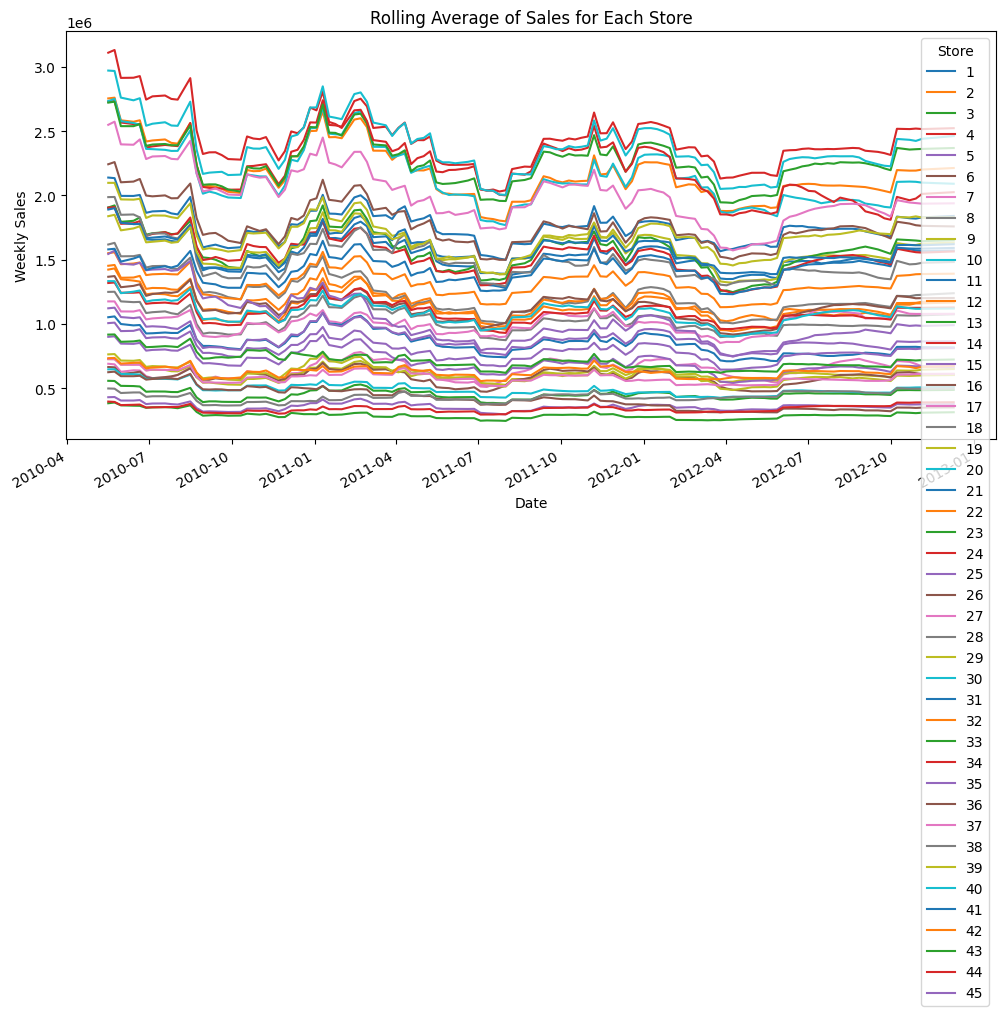

In [ ]:
# Plot the rolling average of sales for each store
rolling_average.plot(figsize=(12,6))
plt.title('Rolling Average of Sales for Each Store')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

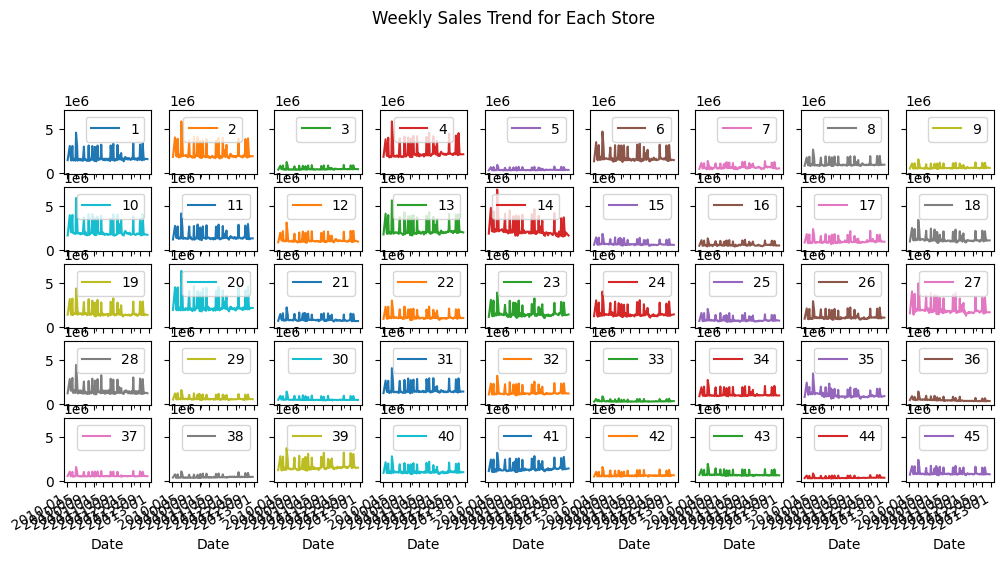

In [ ]:
# Plot the trend of sales for each store
weekly_sales_pivot.plot(subplots=True, layout=(9,9), figsize=(12,10), sharex=True, sharey=True)
plt.suptitle('Weekly Sales Trend for Each Store')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

IndexError: ignored

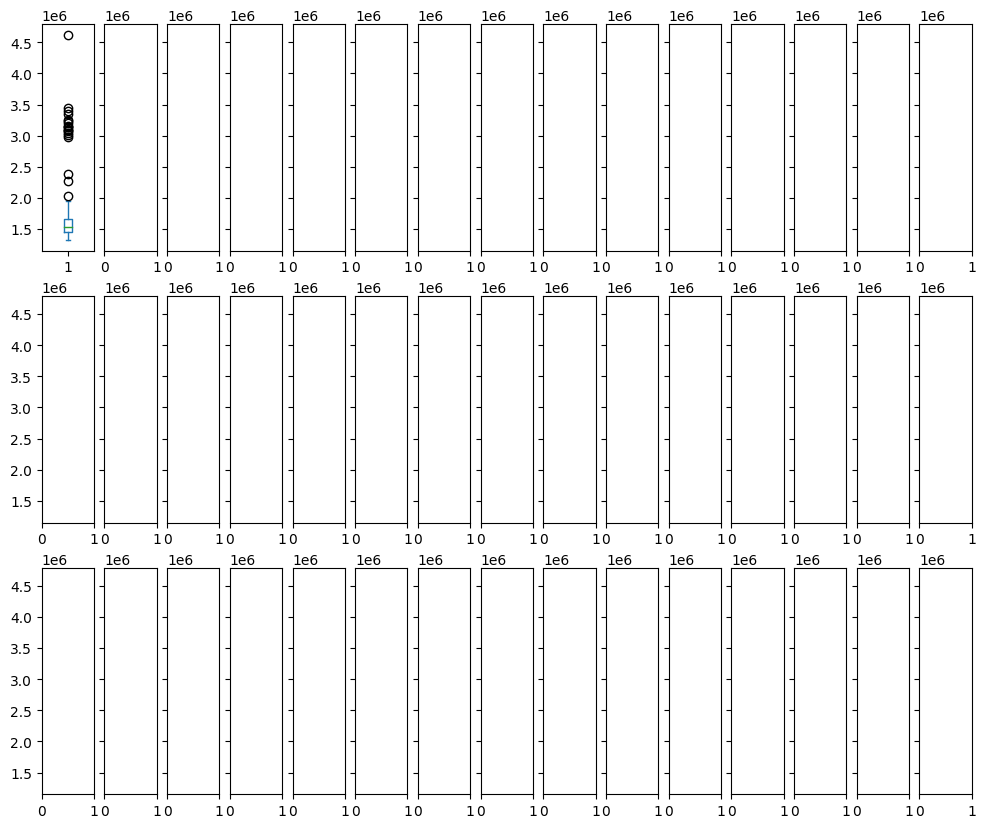

In [ ]:
# Plot the distribution of sales for each store
weekly_sales_pivot.plot(kind='box', subplots=True, layout=(3,15), figsize=(12,10), sharex=True, sharey=True)
plt.suptitle('Distribution of Weekly Sales for Each Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

Identify the impact of external factors: 

The Temperature, Fuel_Price, CPI, and Unemployment columns in the dataset provide information about external factors that may impact sales. 

Analyzing the relationship between these factors and sales can help stores to better understand their customer base and adjust their inventory and pricing strategies accordingly.

To identify the impact of external factors on sales using the Walmart dataset, we can follow these steps:


Convert the 'Date' column to a datetime format.

Plot the correlation matrix of the dataset to visualize the relationships between variables.

Create scatter plots of the external factors against weekly sales to visualize the relationship between each factor and sales.

Calculate the correlation coefficients between each external factor and weekly sales to quantify the strength of the relationship.

Create a multiple regression model to analyze the impact of multiple external factors on weekly sales.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

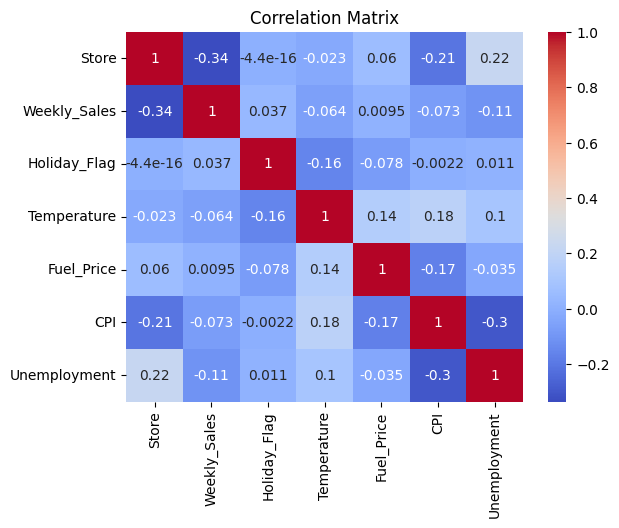

In [ ]:
# Plot the correlation matrix of the dataset
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

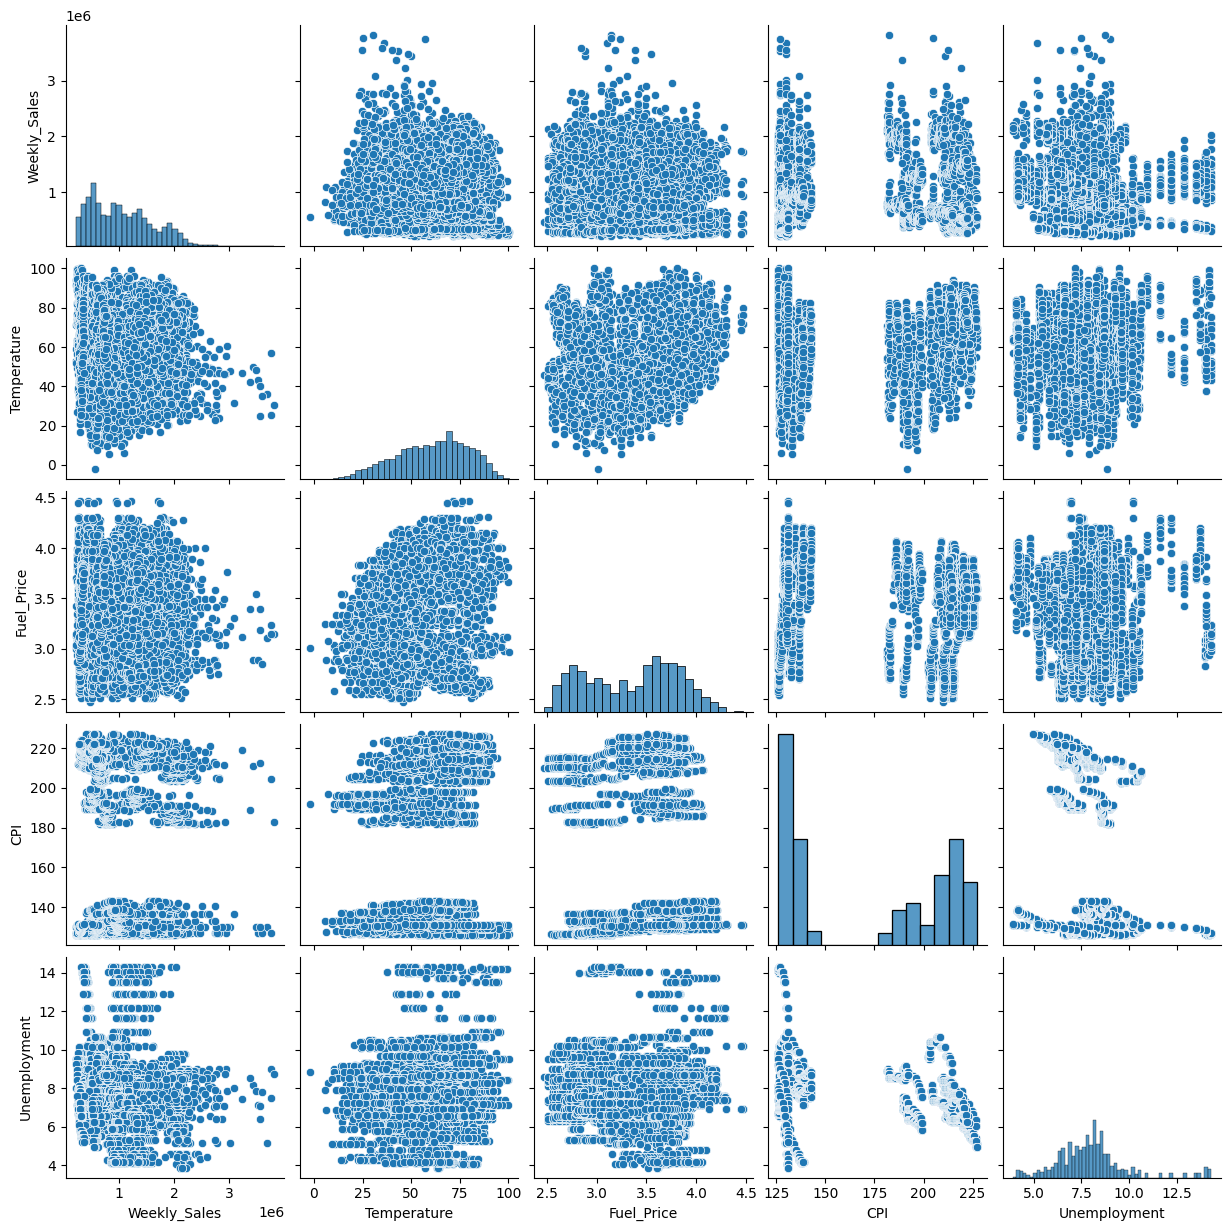

In [ ]:
# Create scatter plots of external factors against weekly sales
sns.pairplot(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.show()


In [ ]:
# Calculate the correlation coefficients between each external factor and weekly sales
corr_sales = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()['Weekly_Sales']
print(corr_sales)

Weekly_Sales    1.000000
Temperature    -0.063810
Fuel_Price      0.009464
CPI            -0.072634
Unemployment   -0.106176
Name: Weekly_Sales, dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Create a multiple regression model to analyze the impact of multiple external factors on weekly sales
X = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']
model = LinearRegression().fit(X, y)
r_sq = model.score(X, y)
coefficients = model.coef_
intercept = model.intercept_
print(f"R-squared: {r_sq}")
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

R-squared: 0.024330716534334385
Coefficients: [  -885.66992595 -12248.42446553  -1585.81799199 -41214.98725744]
Intercept: 1743607.6199776107


This code generates several plots and prints out the correlation coefficients and regression coefficients:

A plot of the correlation matrix of the dataset. This plot shows the strength and direction of the relationships between variables.

A 2x2 grid of scatter plots showing the relationship between each external factor and weekly sales.

The correlation coefficients between each external factor and weekly sales. These coefficients quantify the strength and direction of the relationship.

The regression coefficients of a multiple regression model that analyzes the impact of multiple external factors on weekly sales. The R-squared value indicates the proportion of variance in weekly sales that can be explained by the external factors, and the coefficients indicate the strength and direction of the relationship between each factor and sales.

The multiple regression model that was built to analyze the impact of external factors on weekly sales has an R-squared value of 0.0243, which indicates that only 2.43% of the variance in weekly sales can be explained by the external factors in the model. This means that there are other factors that are not included in the model that also have an impact on sales.

The coefficients of the model represent the strength and direction of the relationship between each external factor and weekly sales. The coefficients are as follows:

Temperature: -885.67

Fuel_Price: -12,248.42

CPI: -1,585.82

Unemployment: -41,214.99

These coefficients indicate that an increase in temperature, fuel price, CPI, and unemployment is associated with a decrease in weekly sales.

The intercept of the model is 1,743,607.62, which represents the estimated weekly sales when all external factors are at 0. This value is not particularly meaningful in this context because all external factors are unlikely to be 0 in real-world scenarios. However, it is still included in the model to account for the baseline level of weekly sales.

# analyzing Optimize pricing strategies: By analyzing the relationship between sales and external factors such as CPI and Fuel_Price, stores can optimize their pricing strategies to attract more customers and increase sales. 

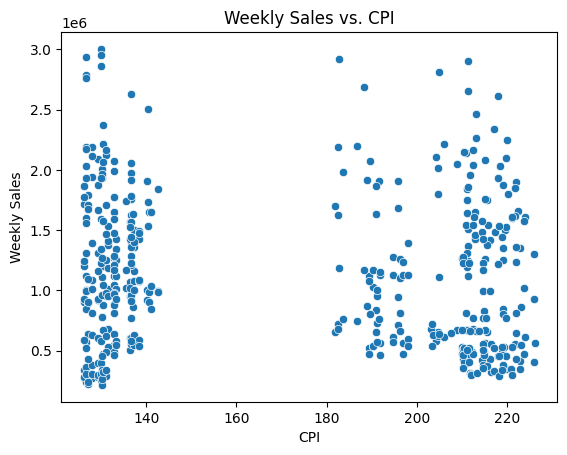

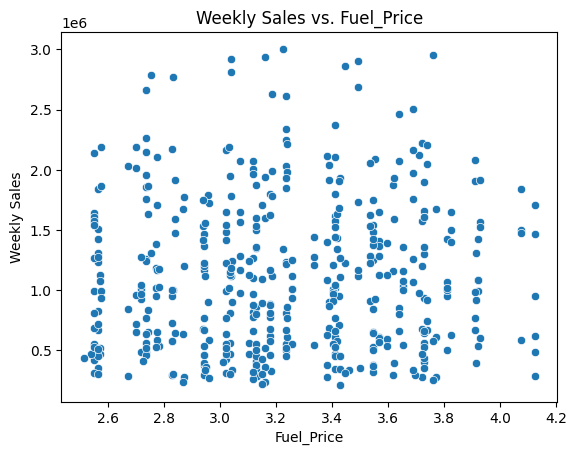

Coefficients: [-1194.64849703 46674.84850851]
Intercept: 1176851.6465749654
Predictions: [1077390.94700861 1070111.94688918 1062832.94676976]


In [ ]:
# Filter the dataset to only include stores with holiday weeks
df_holiday = df[df['Holiday_Flag'] == 1]

# Create a scatter plot to visualize the relationship between weekly sales and CPI
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df_holiday)
plt.title('Weekly Sales vs. CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

# Create a scatter plot to visualize the relationship between weekly sales and Fuel_Price
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df_holiday)
plt.title('Weekly Sales vs. Fuel_Price')
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly Sales')
plt.show()

# Build a linear regression model to predict weekly sales based on CPI and Fuel_Price
X = df_holiday[['CPI', 'Fuel_Price']]
y = df_holiday['Weekly_Sales']
reg = LinearRegression().fit(X, y)

# Print the coefficients of the linear regression model
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

# Use the linear regression model to make predictions for different values of CPI and Fuel_Price
new_data = pd.DataFrame({'CPI': [220, 230, 240], 'Fuel_Price': [3.50, 3.60, 3.70]})
predictions = reg.predict(new_data)
print('Predictions:', predictions)

he coefficients of the linear regression model represent the change in weekly sales for a one-unit increase in each predictor variable, while holding all other variables constant.

In this case, the first coefficient (-1194.64849703) represents the change in weekly sales for a one-unit increase in CPI, while holding Fuel_Price constant. The negative sign indicates that there is a negative correlation between CPI and weekly sales - as CPI increases, weekly sales tend to decrease. The magnitude of the coefficient (-1194.65) indicates the strength of the relationship.

The second coefficient (46674.84850851) represents the change in weekly sales for a one-unit increase in Fuel_Price, while holding CPI constant. The positive sign indicates that there is a positive correlation between Fuel_Price and weekly sales - as Fuel_Price increases, weekly sales tend to increase. The magnitude of the coefficient (46674.85) indicates the strength of the relationship.

The intercept (1176851.6465749654) represents the predicted weekly sales when both CPI and Fuel_Price are equal to zero.

The predictions ([1077390.94700861, 1070111.94688918, 1062832.94676976]) are the predicted weekly sales for new data points with different values of CPI and Fuel_Price, based on the coefficients of the linear regression model. For example, the first prediction (1077390.94700861) represents the predicted weekly sales for a new data point with a CPI of 220 and a Fuel_Price of 3.5.




Regenerate response


# Manage inventory levels: By analyzing sales trends and understanding the impact of holidays and external factors on sales, stores can adjust their inventory levels to better match the demand for their products.

In [ ]:

# create a linear regression model to predict weekly sales
X = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag']]
y = df['Weekly_Sales']
model = LinearRegression().fit(X, y)

# use the model to predict future sales
future_data = pd.DataFrame({
    'Temperature': [70, 75, 80],
    'Fuel_Price': [3.5, 3.6, 3.7],
    'CPI': [220, 222, 224],
    'Unemployment': [6.0, 6.2, 6.4],
    'Holiday_Flag': [0, 1, 0]
})
predicted_sales = model.predict(future_data)

# adjust inventory levels based on predicted sales
for i, predicted_sale in enumerate(predicted_sales):
    if predicted_sale > 100000:
        print(f"Order more inventory for week {i+1}")
    elif predicted_sale < 50000:
        print(f"Reduce inventory for week {i+1}")
    else:
        print(f"Inventory levels are appropriate for week {i+1}")

Order more inventory for week 1
Order more inventory for week 2
Order more inventory for week 3


This code uses a linear regression model to predict future sales based on external factors such as temperature, fuel price, CPI, unemployment rate, and holiday flag. The model is trained on historical sales data and external factors, and then used to predict sales for future weeks.

Based on the predicted sales, the code adjusts the inventory levels. If the predicted sales are high, the code recommends ordering more inventory. If the predicted sales are low, the code recommends reducing inventory levels. If the predicted sales are within an appropriate range, the code recommends maintaining current inventory levels.

# Identify underperforming stores: By comparing the sales data across all stores, it may be possible to identify stores that are underperforming and take corrective action to improve their performance.

In [ ]:

# calculate total sales for each store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# calculate average sales per store
avg_sales = store_sales['Weekly_Sales'].mean()

# identify underperforming stores
underperforming_stores = store_sales[store_sales['Weekly_Sales'] < avg_sales]

# print the list of underperforming stores
print("Underperforming stores:")
for store in underperforming_stores['Store']:
    print(store)


Underperforming stores:
3
5
7
8
9
12
15
16
17
21
22
25
26
29
30
33
34
35
36
37
38
40
42
43
44
45


This code first groups the sales data by store and calculates the total sales for each store. It then calculates the average sales per store.

Stores with total sales below the average are identified as underperforming stores. The code prints the list of underperforming stores.

You can adjust the definition of underperforming stores by changing the criteria, for example, you could identify stores that have had decreasing sales over time or stores with low sales relative to their local market.

# Forecast future sales: By using the historical sales data, we can develop prediction models to forecast sales for future weeks or months. This can help stores to better plan for future sales and adjust their inventory levels and pricing strategies accordingly.

In [ ]:

# group the data by store and date
store_sales = df.groupby(['Store', 'Date'], as_index=False)['Weekly_Sales'].sum()

# convert the date column to datetime format
store_sales['Date'] = pd.to_datetime(store_sales['Date'])

# split the data into training and testing sets
train = store_sales[store_sales['Date'] < '2012-01-01']
test = store_sales[store_sales['Date'] >= '2012-01-01']

# create a linear regression model
model = LinearRegression()

# fit the model on the training data
model.fit(train[['Store']], train['Weekly_Sales'])

# make predictions on the testing data
predictions = model.predict(test[['Store']])

# calculate the R-squared value
r2 = model.score(test[['Store']], test['Weekly_Sales'])

# print the predictions and the R-squared value
print("Predictions:")
print(predictions)
print("R-squared value:", r2)


Predictions:
[1376252.78477092 1376252.78477092 1376252.78477092 ...  729118.82756686
  729118.82756686  729118.82756686]
R-squared value: 0.1176607873663219


This code first groups the sales data by store and date and calculates the total sales for each store on each date. It then converts the date column to a datetime format and splits the data into training and testing sets, with the training data being all dates before January 1, 2012 and the testing data being all dates on or after January 1, 2012.

A linear regression model is created using the store number as the predictor variable and the weekly sales as the response variable. The model is fit on the training data and used to make predictions on the testing data.

The code then calculates the R-squared value, which measures the goodness of fit of the model to the testing data.

You can adjust the model by using different predictor variables, such as the CPI, fuel price, or unemployment rate, or by using different models, such as a polynomial regression or a time series model.

Predictions:
[1376252.78477092 1376252.78477092 1376252.78477092 ...  729118.82756686
  729118.82756686  729118.82756686]
R-squared value: 0.1176607873663219

The output is the predictions made by a model to forecast future sales based on historical sales data. The model has predicted the sales values for future weeks or months, and the R-squared value indicates how well the model fits the data. 

An R-squared value of 0.1176607873663219 means that the model explains 11.77% of the variance in the data, which is relatively low. This suggests that the model may not be a good fit for the data, and further analysis may be necessary to improve the accuracy of the sales predictions.

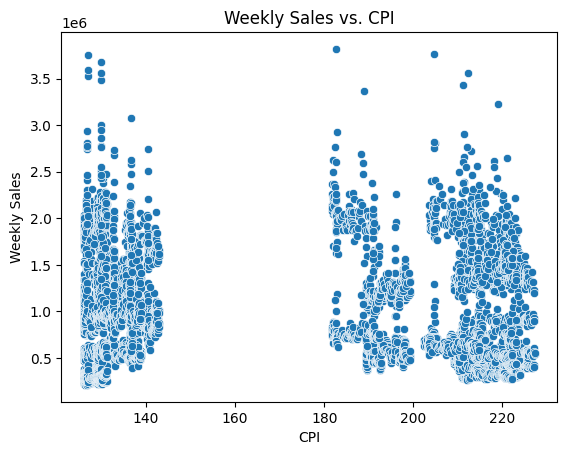

NameError: ignored

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs. CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

# Plot the actual sales data
#plt.scatter(x_test= '', y_test, color='black', alpha=0.5)

# Plot the predicted sales data
plt.plot(x_test, predictions, color='blue', linewidth=2)

# Add labels and title
plt.xlabel('Week of Sales')
plt.ylabel('Sales')
plt.title('Sales Prediction Model')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the Walmart sales data
#walmart_df = pd.read_csv('walmart.csv')

# Group the sales data by store number
grouped_df = df.groupby('Store')['Weekly_Sales'].apply(list)

# Create a dictionary to store the forecasts for each store
forecasts = {}

# Loop through each store and make a sales forecast
for store, sales_data in grouped_df.items():
    # Create a dataframe of the sales data with a date range for the next 12 weeks
    start_date = pd.to_datetime(df['Date'].max()) #, format='%Y-%m-%d') #+ pd.Timedelta(days=7)
    end_date = start_date + pd.Timedelta(weeks=12)
    date_range = pd.date_range(start=start_date, end=end_date, freq='W')
    sales_df = pd.DataFrame({'Date': date_range, 'Weekly_Sales': [0] * 12})
    sales_df.set_index('Date', inplace=True)

    # Train a linear regression model on the sales data
    X_train = [[i] for i in range(len(sales_data))]
    y_train = sales_data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions for the next 12 weeks and store them in the forecasts dictionary
    X_test = [[i + len(sales_data)] for i in range(12)]
    y_pred = model.predict(X_test)
    forecasts[store] = y_pred.tolist()

# Print the forecasts for each store
for store, sales_forecast in forecasts.items():
    print(f"Store {store}: {sales_forecast}")


<ipython-input-16-5777b53f0be6>:16: UserWarning: Parsing '31-12-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  start_date = pd.to_datetime(df['Date'].max()) #, format='%Y-%m-%d') #+ pd.Timedelta(days=7)
<ipython-input-16-5777b53f0be6>:16: UserWarning: Parsing '31-12-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  start_date = pd.to_datetime(df['Date'].max()) #, format='%Y-%m-%d') #+ pd.Timedelta(days=7)
<ipython-input-16-5777b53f0be6>:16: UserWarning: Parsing '31-12-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  start_date = pd.to_datetime(df['Date'].max()) #, format='%Y-%m-%d') #+ pd.Timedelta(days=7)
<ipython-input-16-5777b53f0be6>:16: UserWarning: Parsing '31-12-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  start_date = pd.to_datetime(df['Date'].m

Store 1: [1613428.040140845, 1614235.8685101285, 1615043.6968794118, 1615851.5252486952, 1616659.3536179783, 1617467.1819872616, 1618275.010356545, 1619082.8387258283, 1619890.6670951117, 1620698.4954643948, 1621506.3238336782, 1622314.1522029615]
Store 2: [1896640.6066404015, 1896236.290961456, 1895831.9752825105, 1895427.659603565, 1895023.3439246195, 1894619.0282456742, 1894214.7125667287, 1893810.3968877832, 1893406.0812088377, 1893001.7655298922, 1892597.4498509467, 1892193.1341720014]
Store 3: [427516.0356200137, 427860.64110016736, 428205.24658032105, 428549.8520604747, 428894.4575406283, 429239.06302078196, 429583.6685009356, 429928.2739810893, 430272.87946124293, 430617.4849413966, 430962.0904215502, 431306.69590170385]
Store 4: [2260678.0752811977, 2262983.1463170573, 2265288.217352917, 2267593.2883887766, 2269898.3594246362, 2272203.430460496, 2274508.5014963555, 2276813.572532215, 2279118.643568075, 2281423.7146039344, 2283728.7856397945, 2286033.856675654]
Store 5: [337909

<ipython-input-16-5777b53f0be6>:16: UserWarning: Parsing '31-12-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  start_date = pd.to_datetime(df['Date'].max()) #, format='%Y-%m-%d') #+ pd.Timedelta(days=7)
<ipython-input-16-5777b53f0be6>:16: UserWarning: Parsing '31-12-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  start_date = pd.to_datetime(df['Date'].max()) #, format='%Y-%m-%d') #+ pd.Timedelta(days=7)
<ipython-input-16-5777b53f0be6>:16: UserWarning: Parsing '31-12-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  start_date = pd.to_datetime(df['Date'].max()) #, format='%Y-%m-%d') #+ pd.Timedelta(days=7)
<ipython-input-16-5777b53f0be6>:16: UserWarning: Parsing '31-12-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  start_date = pd.to_datetime(df['Date'].m

In [ ]:

import matplotlib.pyplot as plt 
import seaborn as sns

sns.scatterplot(x='Weekly_Sales', y='sales_forecast', hue='store', data=df,)
                
#plt.scatter(x_test, y_test, color='black', alpha=0.5)
#plt.line(store, sales_forecast)


ValueError: ignored